In [1]:
from manifold_learning import IMD
import manifold_learning
from FastCCM import CCM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_traffic_dataset
from sklearn.preprocessing import StandardScaler
import importlib

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [3]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(-20,20,12), 
                                       np.linspace(1,50,12))).reshape(2,-1).T

In [4]:
X_ = [get_truncated_lorenz_rand(800,n_steps=40000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T


In [5]:
observables = StandardScaler().fit_transform(observables)

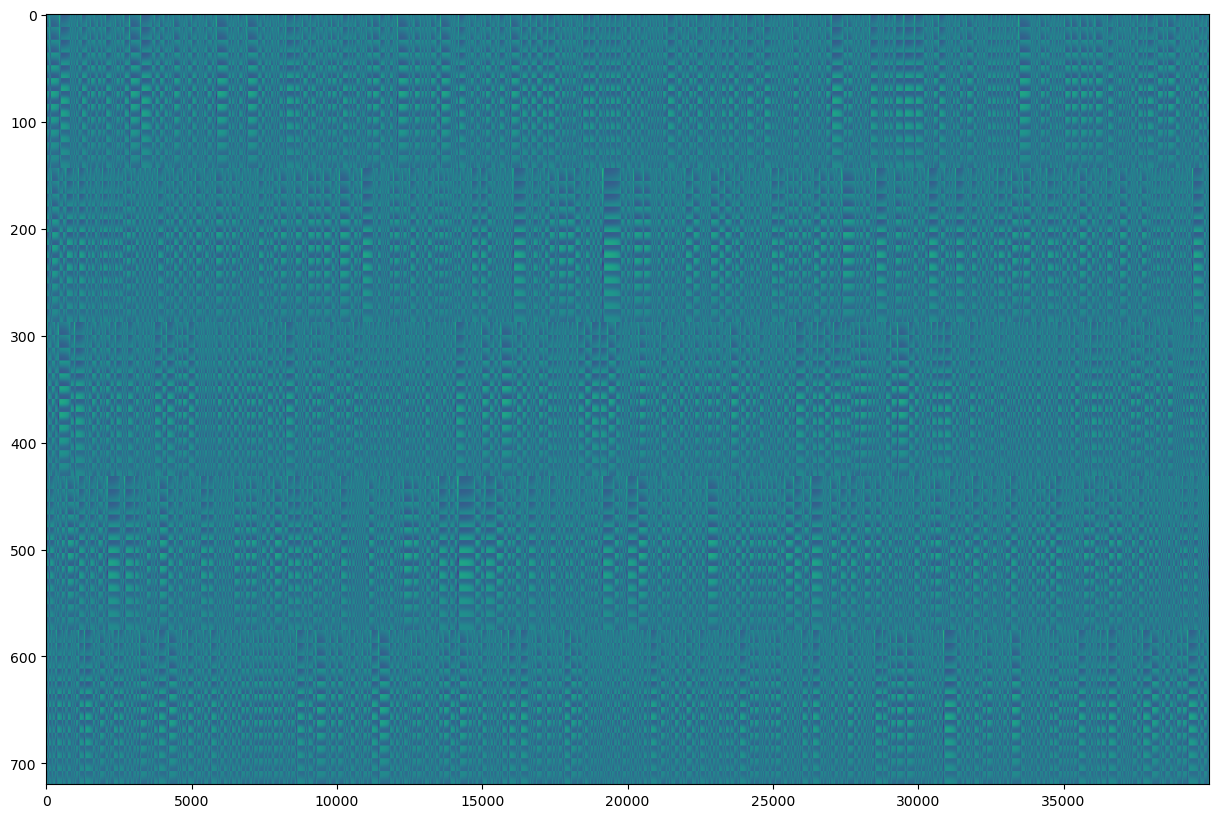

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(observables.T,aspect="auto")

In [117]:
observables = observables @ np.random.normal(size=(observables.shape[1],500))

In [7]:
trainer = IMD.IMD_1D(observables.shape[1],n_components=5,subtract_corr=True, device="cuda")


In [8]:

trainer.fit(observables, embed_dim=3, embed_lag=5, sample_len=400, library_len=1200, 
            exclusion_rad=20, nbrs_num=30, tp=20, 
            epochs=1500, num_batches=32,optimizer="RMSprop", learning_rate=0.0005,tp_policy="fixed")

Epoch 1/1500, Loss: 1.0890
Epoch 2/1500, Loss: 1.0471
Epoch 3/1500, Loss: 1.0372
Epoch 4/1500, Loss: 1.0214
Epoch 5/1500, Loss: 1.0018
Epoch 6/1500, Loss: 1.0007
Epoch 7/1500, Loss: 0.9777
Epoch 8/1500, Loss: 0.9714
Epoch 9/1500, Loss: 0.9765
Epoch 10/1500, Loss: 0.9586
Epoch 11/1500, Loss: 0.9527
Epoch 12/1500, Loss: 0.9303
Epoch 13/1500, Loss: 0.9124
Epoch 14/1500, Loss: 0.8407
Epoch 15/1500, Loss: 0.7844
Epoch 16/1500, Loss: 0.7703
Epoch 17/1500, Loss: 0.7557
Epoch 18/1500, Loss: 0.6852
Epoch 19/1500, Loss: 0.6686
Epoch 20/1500, Loss: 0.6475
Epoch 21/1500, Loss: 0.6456
Epoch 22/1500, Loss: 0.6306
Epoch 23/1500, Loss: 0.6416
Epoch 24/1500, Loss: 0.6133
Epoch 25/1500, Loss: 0.5986
Epoch 26/1500, Loss: 0.5721
Epoch 27/1500, Loss: 0.5576
Epoch 28/1500, Loss: 0.5555
Epoch 29/1500, Loss: 0.5469
Epoch 30/1500, Loss: 0.5516
Epoch 31/1500, Loss: 0.5477
Epoch 32/1500, Loss: 0.5590
Epoch 33/1500, Loss: 0.5578
Epoch 34/1500, Loss: 0.5648
Epoch 35/1500, Loss: 0.5623
Epoch 36/1500, Loss: 0.5567
E

KeyboardInterrupt: 

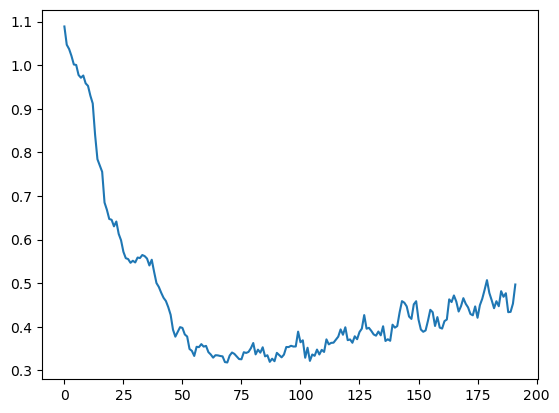

In [9]:
plt.plot(trainer.get_loss_history()[:])


In [10]:

unmixed = trainer.predict(observables)

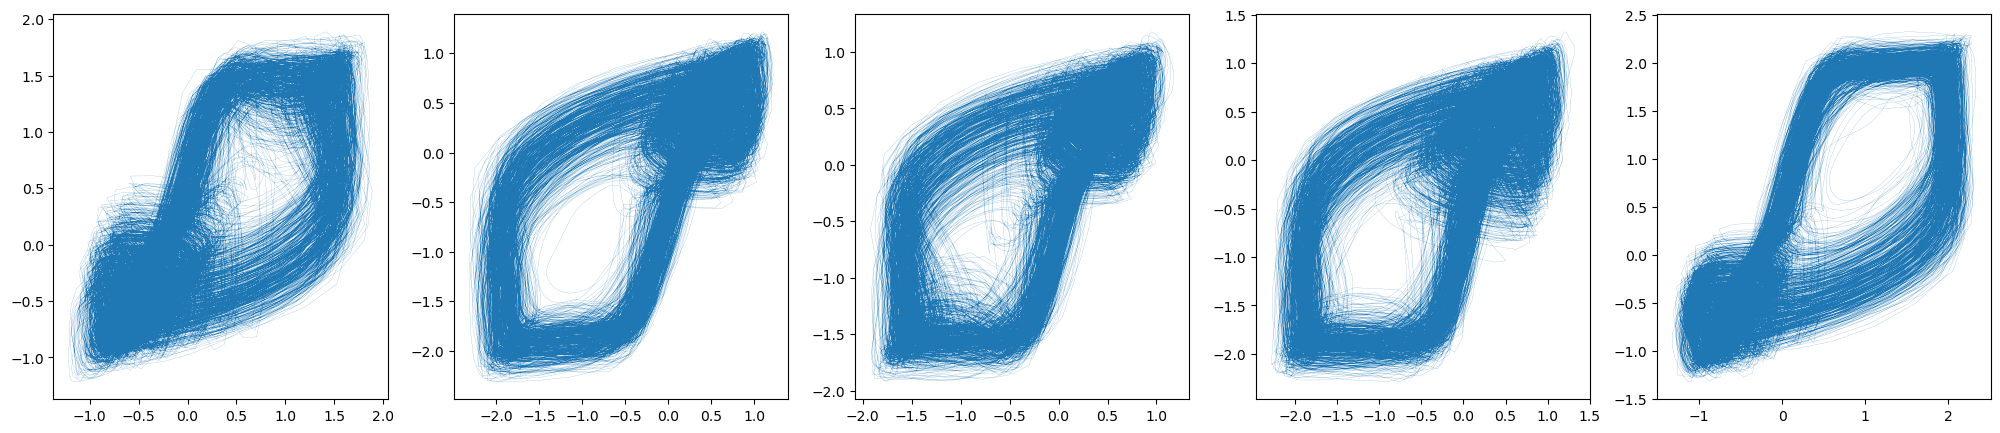

In [11]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    plt.plot(unmixed[:-5,i],unmixed[5:,i],linewidth=0.1)

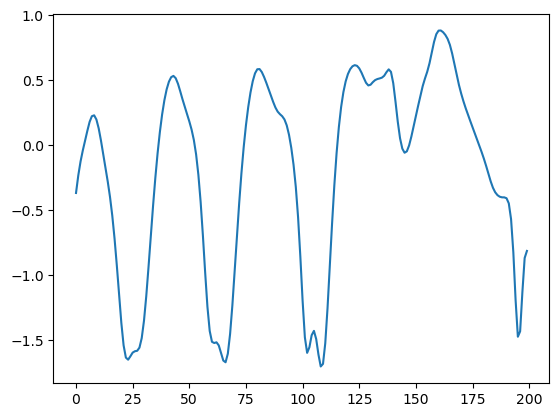

In [12]:
plt.plot(unmixed[:200,2])

In [13]:
unmixed_td = utils.get_td_embedding_np(unmixed[:,:,0],3,5)

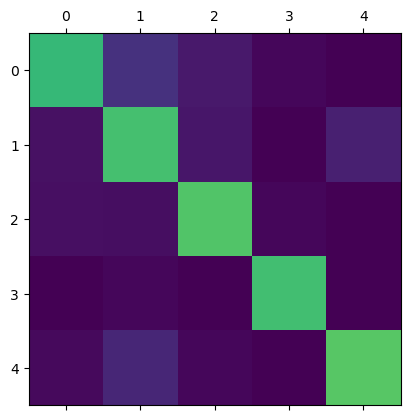

In [14]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed_td,axes=(2,0,1)),np.transpose(unmixed_td,axes=(2,0,1)),1500,400,60,30,30).mean(axis=0),vmin=0,vmax=1)


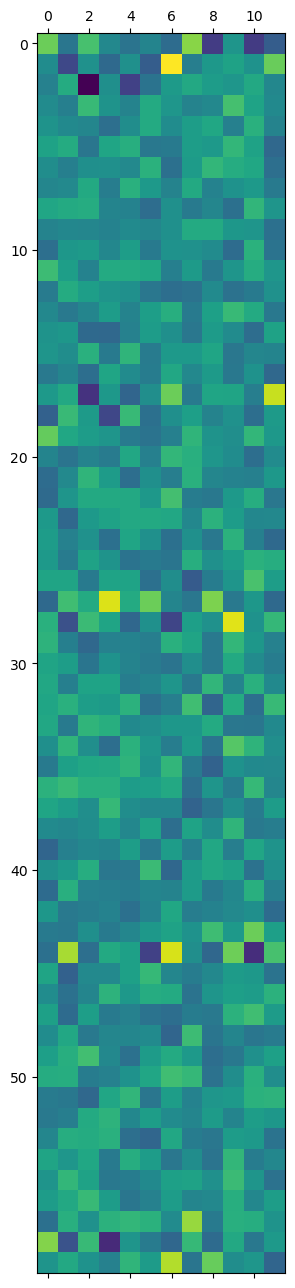

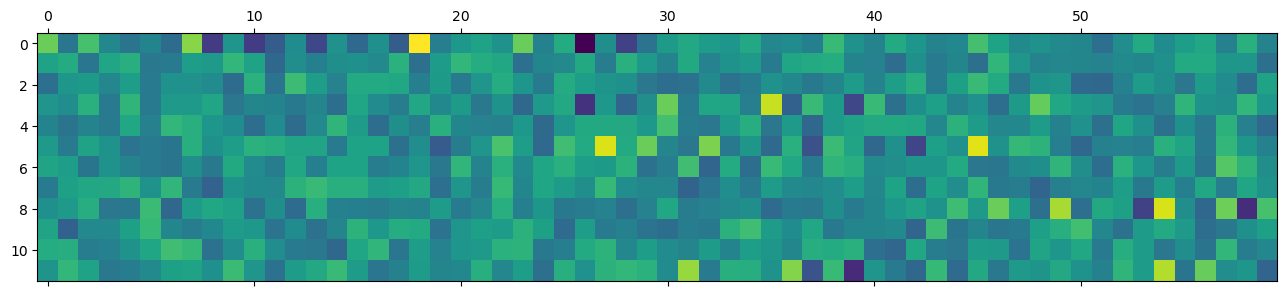

In [15]:
plt.matshow(trainer.model.get_weights()[:,1].reshape(60,12))
plt.matshow(trainer.model.get_weights()[:,1].reshape(12,60))